In [94]:
r = 3
c = 2
obs3 = np.full([3, 2], -1, dtype=int)
obs3
for i in range(r):
    for j in range(c):
        print(111, i, j)
    
# random.random()

a = {(0, 0): 0, (1, 0): 0.2, (2, 0): 0.2, (3, 0): 0.2, (4, 0): 0.2}
weighted_random(a)

111 0 0
111 0 1
111 1 0
111 1 1
111 2 0
111 2 1


(2, 0)

In [2]:
from itertools import product
list(product(*[[row for row in range(5)],
                                  [column for column in range(1)]]))

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0)]

In [6]:
import random
import numpy as np
from itertools import product
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True)

class Search:
    def __init__(self, rows, cols, log_p=True):
        self.rows = rows
        self.cols = cols
        self.actions = list(product(*[[row for row in range(rows)],
                                      [column for column in range(cols)]]))
        self.cell_distance = 5  # how many visual degrees one cell length is in the device
        self.found_reward = 20  # how much finding the target gives reward

        # The visual search model calculates a lot of distances with a fixed
        # number of parameters. Makes it faster to tabulate.
        self.distances = {}

        # Task type. 0 means that the search target is randomly among
        # the items. 1 means that the target is always the last
        # item that is looked at.
        self.task_type = 0

        self.belief = repr(["No Info", "No Info"])

        # additional variable to track model statistics.
        self.model_time = 0
        self.total_rewards = 0
        self.total_search_time = 0
        self.fixation_count = 0

        # RL
        self.alpha = 0.1
        self.gamma = 0.9
        self.softmax_temp = 1.0

        self.learning = True

        self.q = {}

        # log configurations.
        self.log_header = "trial task.type encoding modeltime mt"
        self.stat_recorder = []
        self.log = []
        self.log_p = log_p

        self.trial = 0

In [82]:
import random
import numpy as np
from itertools import product
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True)

class Search:
    
    from search import __init__
    
    def clear(self, starting_location = None):
        self.trial += 1
        self.encoding_n = 0

        self.randomise_search_device()
        self.obs = obs = np.full([self.rows, self.cols], -1, dtype=int)
        self.found = False
        self.reward = 0
        self.mt = 0

        self.total_rewards = 0
        self.total_search_time = 0
        self.fixation_count = 0

        # Start with the given, or a random, eye location but do not
        # observe that location. Reward for the start is 0.
        if starting_location == None:
            self.action = random.choice(self.actions)
        else:
            self.action = self.actions[starting_location]
        self.previous_action = self.action
        self.eye_loc = self.action

        self.set_belief_state()
        self.reward = 0

    
    def set_belief_state(self):
        # Must turn belief state into string, otherwise too complicated structure.
        self.belief = repr([self.eye_loc, self.obs, self.target])
        # Update Q
        if self.belief not in self.q:
            self.q[self.belief] = {}
            for action in self.actions:
                self.q[self.belief][action] = 0.0
    
    def randomise_search_device(self):
        self.device = np.zeros([self.rows, self.cols], dtype=int)
        self.task_type = random.choice([0, 1])
        print(self.task_type)
        if self.task_type == 0:
            row = random.randint(0, self.rows - 1)
            col = random.randint(0, self.cols - 1)
            self.device[row][col] = 1
            self.target = [row, col]
        else:
            self.target = None
        return self.device
    
    

# Setup experiment with a menu with 5 items with a dropdown structure.
experiment_instance = Search(5, 1)

print("Before clear")
print(experiment_instance.belief)

experiment_instance.clear(starting_location = 0)

print("After clear")
print(experiment_instance.belief)
# print(experiment_instance.q)

Before clear
['No Info', 'No Info']
1
After clear
[(0, 0), array([[-1],
       [-1],
       [-1],
       [-1],
       [-1]]), None]


In [8]:
import random
import numpy as np
from itertools import product
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True)

class Search:
    from search import __init__, clear, randomise_search_device, set_belief_state
    
    def observe(self):
        if self.action:
            self.obs[self.action[0], self.action[1]] = self.device[self.action[0], self.action[1]]
        return self.obs

# Setup experiment with a menu with 5 items with a dropdown structure.
experiment_instance = Search(5, 1)
experiment_instance.clear()
print('device', experiment_instance.device)

for n in range(0, 3):
    print("Fixated at: ", experiment_instance.action)
    observation = experiment_instance.observe()
    experiment_instance.clear()
    print ("State observed: ", observation)
    print('device', experiment_instance.device)

device [[0]
 [0]
 [0]
 [0]
 [0]]
Fixated at:  (3, 0)
State observed:  [[-1]
 [-1]
 [-1]
 [ 0]
 [-1]]
device [[0]
 [0]
 [1]
 [0]
 [0]]
Fixated at:  (3, 0)
State observed:  [[-1]
 [-1]
 [-1]
 [ 0]
 [-1]]
device [[0]
 [0]
 [0]
 [0]
 [0]]
Fixated at:  (2, 0)
State observed:  [[-1]
 [-1]
 [ 0]
 [-1]
 [-1]]
device [[0]
 [1]
 [0]
 [0]
 [0]]


In [84]:
import math
import random
import numpy as np
from itertools import product
import matplotlib.pyplot as plt

from search import weighted_random

np.set_printoptions(suppress=True)

class Search:
    from search import __init__, clear, randomise_search_device, set_belief_state 
    
    def choose_action_softmax(self):
        p = {}
        print(self.q)
        print(self.belief)
        for a in self.q[self.belief].keys():
            print(a, self.q[self.belief][a])
            p[a] = math.exp(self.q[self.belief][a] / self.softmax_temp)
        print(p)
        s = sum(p.values())
        print(s)
        if s != 0:
            p = {k: v / s for k, v in p.items()}
            print(p)
            self.action = weighted_random(p)
        else:
            self.action = np.random.choice(list(p.keys()))

# Setup experiment with a menu with 5 items with a dropdown structure.
experiment_instance = Search(5, 1)
experiment_instance.clear()

for n in range(0, 4):
    print("Belief State: ", experiment_instance.belief)
    experiment_instance.choose_action_softmax()
    print ("Action chosen: ", experiment_instance.action)
#     experiment_instance.clear()

Belief State:  [(2, 0), array([[-1],
       [-1],
       [-1],
       [-1],
       [-1]])]
{'[(2, 0), array([[-1],\n       [-1],\n       [-1],\n       [-1],\n       [-1]])]': {(0, 0): 0.0, (1, 0): 0.0, (2, 0): 0.0, (3, 0): 0.0, (4, 0): 0.0}}
[(2, 0), array([[-1],
       [-1],
       [-1],
       [-1],
       [-1]])]
(0, 0) 0.0
(1, 0) 0.0
(2, 0) 0.0
(3, 0) 0.0
(4, 0) 0.0
{(0, 0): 1.0, (1, 0): 1.0, (2, 0): 1.0, (3, 0): 1.0, (4, 0): 1.0}
5.0
{(0, 0): 0.2, (1, 0): 0.2, (2, 0): 0.2, (3, 0): 0.2, (4, 0): 0.2}
Action chosen:  (3, 0)
Belief State:  [(2, 0), array([[-1],
       [-1],
       [-1],
       [-1],
       [-1]])]
{'[(2, 0), array([[-1],\n       [-1],\n       [-1],\n       [-1],\n       [-1]])]': {(0, 0): 0.0, (1, 0): 0.0, (2, 0): 0.0, (3, 0): 0.0, (4, 0): 0.0}}
[(2, 0), array([[-1],
       [-1],
       [-1],
       [-1],
       [-1]])]
(0, 0) 0.0
(1, 0) 0.0
(2, 0) 0.0
(3, 0) 0.0
(4, 0) 0.0
{(0, 0): 1.0, (1, 0): 1.0, (2, 0): 1.0, (3, 0): 1.0, (4, 0): 1.0}
5.0
{(0, 0): 0.2, (1, 0): 0.2

In [80]:
import math
import random
import numpy as np
from itertools import product
import matplotlib.pyplot as plt

from search import weighted_random

np.set_printoptions(suppress=True)

class Search:
    from search import __init__, clear, randomise_search_device, set_belief_state, choose_action_softmax
    
    # Eye movement and encoding time come from EMMA (Salvucci, 2001). Also
    # return if a fixation occurred.
    def EMMA_fixation_time(self, distance, freq=0.1, encoding_noise=False):
        emma_KK = 0.006
        emma_k = 0.4
        emma_prep = 0.135
        emma_exec = 0.07
        emma_saccade = 0.002
        E = emma_KK * -math.log(freq) * math.exp(emma_k * distance)
        if encoding_noise:
            E += np.random.gamma(E, E / 3)
        if E < emma_prep: return E, False
        S = emma_prep + emma_exec + emma_saccade * distance
        if (E <= S): return S, True
        E_new = (emma_k * -math.log(freq))
        if encoding_noise:
            E_new += np.random.gamma(E_new, E_new / 3)
        T = (1 - (S / E)) * E_new
        return S + T, True

    # Euclidian distance between two points. Use lookuptable for reference
    # or update it with a new entry.
    def distance(self, x1, y1, x2, y2):
        if (x1, y1, x2, y2) not in self.distances:
            self.distances[(x1, y1, x2, y2)] = math.sqrt(pow(x1 - x2, 2) + pow(y1 - y2, 2))
        return self.distances[(x1, y1, x2, y2)]

# Setup experiment with a menu with 5 items with a dropdown structure.
experiment_instance = Search(5, 1)
experiment_instance.clear()

print("Belief State: ", experiment_instance.belief)
experiment_instance.choose_action_softmax()
print ("Action chosen: ", experiment_instance.action)
print("eye location: ", experiment_instance.eye_loc)
eccentricity = experiment_instance.distance(experiment_instance.eye_loc[0], 
                                            experiment_instance.eye_loc[1], 
                                            experiment_instance.action[0], 
                                            experiment_instance.action[1])
print(eccentricity, experiment_instance.cell_distance)

mt, moved = experiment_instance.EMMA_fixation_time(eccentricity * experiment_instance.cell_distance, encoding_noise=False)

print("Distance moved: ", eccentricity * experiment_instance.cell_distance)
print("Time taken: ", mt, "secs")

Belief State:  [(4, 0), array([[-1],
       [-1],
       [-1],
       [-1],
       [-1]])]
Action chosen:  (4, 0)
eye location:  (4, 0)
0.0 6
Distance moved:  0.0
Time taken:  0.013815510557964273 secs


In [11]:
import math
import random
import numpy as np
from itertools import product
import matplotlib.pyplot as plt

from search import weighted_random

np.set_printoptions(suppress=True)

class Search:
    from search import __init__, clear, randomise_search_device, set_belief_state, \
    choose_action_softmax, observe, do_iteration, distance, EMMA_fixation_time, calculate_reward
    
    def update_q_sarsa(self):
        if self.learning:
            previous_q = self.q[self.previous_belief][self.previous_action]
            next_q = self.q[self.belief][self.action]
            self.q[self.previous_belief][self.previous_action] = \
                previous_q + self.alpha * (self.reward + self.gamma * next_q - previous_q)

    def update_q_td(self):
        if self.learning:
            previous_q = self.q[self.belief][self.action]
            self.q[self.belief][self.action] = \
                previous_q + self.alpha * (self.reward - previous_q)

# Setup experiment with a menu with 5 items with a dropdown structure.
experiment_instance = Search(5, 1)
experiment_instance.clear()
experiment_instance.alpha = 1.0 # for display purpose ignore learning rate.
experiment_instance.previous_belief = experiment_instance.belief
print("Before update Q-table:", experiment_instance.q[experiment_instance.previous_belief])
experiment_instance.do_iteration()
experiment_instance.update_q_sarsa()
print("After update Q-table:", experiment_instance.q[experiment_instance.previous_belief])


Before update Q-table: {(0, 0): 0.0, (1, 0): 0.0, (2, 0): 0.0, (3, 0): 0.0, (4, 0): 0.0}
After update Q-table: {(0, 0): -1.284795643512616, (1, 0): 0.0, (2, 0): 0.0, (3, 0): 0.0, (4, 0): 0.0}


In [100]:
import math
import random
import numpy as np
from itertools import product
import matplotlib.pyplot as plt

from search import weighted_random

np.set_printoptions(suppress=True)

class Search:
    from search import __init__, clear, randomise_search_device, set_belief_state, update_q_sarsa, update_q_td, \
    choose_action_softmax, observe, do_iteration, distance, EMMA_fixation_time
    
    def do_iteration(self, debug=False):
        if self.found:
            self.clear()

        self.encoding_n += 1

        self.previous_belief = self.belief
        self.observe()
        self.set_belief_state()

        self.previous_action = self.action
        self.choose_action_softmax()

        self.update_q_sarsa()
        
        print('q', self.q)

        # Move eyes, calculate mt.
        eccentricity = self.distance(self.eye_loc[0], self.eye_loc[1], self.action[0], self.action[1])
        self.mt, moved = self.EMMA_fixation_time(eccentricity * self.cell_distance, encoding_noise=True)
        self.total_search_time += self.mt
        if moved:
            self.eye_loc = self.action
            self.fixation_count += 1

        # Calculate reward and mark if target found.
        self.calculate_reward()

        # Learn TD here if found, because next iteration will clear the model.
        if self.found:
            self.update_q_td()

        if self.log_p:
            self.log.append("{} {} {} {} {}".format(self.trial, self.task_type,
                                                    self.encoding_n, self.model_time, self.mt))
    
    def calculate_reward(self):
        # Target found.
        if self.device[self.action[0], self.action[1]] == 1:
            self.mt += 0.15  # add motor movement time for response
            self.reward = self.found_reward - self.mt
            self.found = True
        elif self.task_type == 1 and self.obs.mean() == 0:
            # All elements uncovered (no target present).
            self.mt += 0.15  # add motor movement time for response
            self.reward = self.found_reward - self.mt
            self.found = True
        else:
            # Target not yet found.
            self.reward = -self.mt

# Setup experiment with a menu with 5 items with a dropdown structure.
experiment_instance = Search(5, 1)
experiment_instance.clear()

print("Initial Belief State: ", experiment_instance.belief)
print("Eye Position: ", experiment_instance.eye_loc)
experiment_instance.do_iteration()

print("Belief State: ", experiment_instance.belief)
print("Eye Position: ", experiment_instance.eye_loc)

experiment_instance.do_iteration()
experiment_instance.do_iteration()

Initial Belief State:  [(4, 0), array([[-1],
       [-1],
       [-1],
       [-1],
       [-1]])]
Eye Position:  (4, 0)
q {'[(4, 0), array([[-1],\n       [-1],\n       [-1],\n       [-1],\n       [-1]])]': {(0, 0): 0.0, (1, 0): 0.0, (2, 0): 0.0, (3, 0): 0.0, (4, 0): 0.0}, '[(4, 0), array([[-1],\n       [-1],\n       [-1],\n       [-1],\n       [ 0]])]': {(0, 0): 0.0, (1, 0): 0.0, (2, 0): 0.0, (3, 0): 0.0, (4, 0): 0.0}}
Belief State:  [(4, 0), array([[-1],
       [-1],
       [-1],
       [-1],
       [ 0]])]
Eye Position:  (0, 0)
q {'[(4, 0), array([[-1],\n       [-1],\n       [-1],\n       [-1],\n       [-1]])]': {(0, 0): 0.0, (1, 0): 0.0, (2, 0): 0.0, (3, 0): 0.0, (4, 0): 0.0}, '[(4, 0), array([[-1],\n       [-1],\n       [-1],\n       [-1],\n       [ 0]])]': {(0, 0): 1.835596959483506, (1, 0): 0.0, (2, 0): 0.0, (3, 0): 0.0, (4, 0): 0.0}, '[(1, 0), array([[-1],\n       [-1],\n       [-1],\n       [-1],\n       [-1]])]': {(0, 0): 0.0, (1, 0): 0.0, (2, 0): 0.0, (3, 0): 0.0, (4, 0): 0.

Running model... 0.0 1 1.0 0
Running model... 0.1 2294 0.91 672
Running model... 0.2 2553 0.82 793
Running model... 0.3 2621 0.72 778
Running model... 0.4 2623 0.63 316
Running model... 0.5 2623 0.53 0
Running model... 0.6 2623 0.44 0
Running model... 0.7 2623 0.34 0
Running model... 0.8 2623 0.25 0
Running model... 0.9 2623 0.15 0


task.type,0,1
search.time.mean,2.3,6.1
search.time.std,1.9,1.4
n.fixation.mean,3.9,9
n.fixation.std,2.5,0
total.reward.mean,17.7,13.9
total.reward.std,1.9,1.4


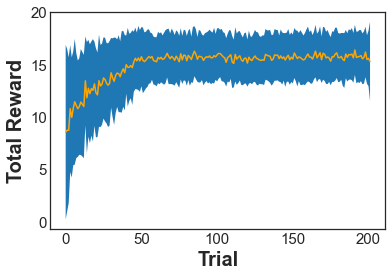

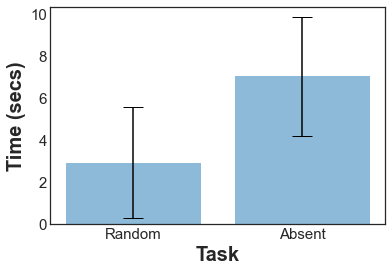

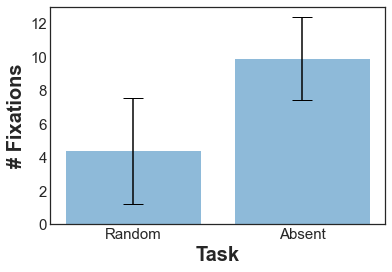

In [133]:
%matplotlib inline
import math
import random
import tabulate
import numpy as np
import pandas as pd
from itertools import product
import matplotlib.pyplot as plt
from IPython.display import HTML, display

from search import weighted_random, plot_asc

#np.set_printoptions(suppress=True)

class Search:
    from search import __init__, clear, randomise_search_device, set_belief_state, update_q_sarsa, update_q_td, \
    choose_action_softmax, observe, do_iteration, distance, EMMA_fixation_time, calculate_reward, learn_model, \
    print_stats, write_data_to_file, plot_stats
    
    def run_experiment(self, trials, familiarity, filename='logs.txt', learning=True, debug=False):
        
        self.recall_time = familiarity
        self.learning = learning
        self.clear()
        self.learn_model(trials, debug)
        self.write_data_to_file(filename)
        
    def observe(self):
#         if self.eyes_moved:
#             for r in range(self.rows):
#                 for c in range(self.cols):
#                     if self.obs[r][c] == 0 and random.random() < 0.05:
#                         self.obs[r][c] = -1
                    
                    
        if self.action:
            self.obs[self.action[0], self.action[1]] = self.device[self.action[0], self.action[1]]
        return self.obs

        
    def set_belief_state(self):
        # Must turn belief state into string, otherwise too complicated structure.
#         if self.mt > self.recall_time and self.target:
#             self.obs[self.target[0], self.target[1]] = self.device[self.target[0], self.target[1]]
#             self.belief = repr([self.eye_loc, self.obs, self.target])
#         print('mt', self.mt)
#         print('target', self.target)
#         print('obsevation', self.obs)
#         print('device', self.device)
#         else:
        self.belief = repr([self.eye_loc, self.obs])
        # Update Q
        if self.belief not in self.q:
            self.q[self.belief] = {}
            for action in self.actions:
                self.q[self.belief][action] = 0.0

        
# Setup experiment with a menu with 5 items with a dropdown structure.
experiment_instance = Search(3, 3, True)


# Train model
X = 4
experiment_instance.run_experiment(100000, X, debug=True)
experiment_instance.print_stats(1000)
experiment_instance.plot_stats(100)